In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

from microsim import schema as ms
from microsim.util import ortho_plot

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(128, 256, 256), scale=(0.04, 0.02, 0.02)),
    output_space={"downscale": 8},
    sample=ms.Sample(labels=[ms.MatsLines(density=1, length=8, azimuth=10, max_r=0.9)]),
    modality=ms.SIM3D(angles = [np.pi/2], nphases=1),
    detector=ms.CameraCCD(
        qe=0.82, full_well=18000, read_noise=6, bit_depth=12, offset=100
    ),
    settings=ms.Settings(random_seed=100),
    output_path="au1.tif",
)

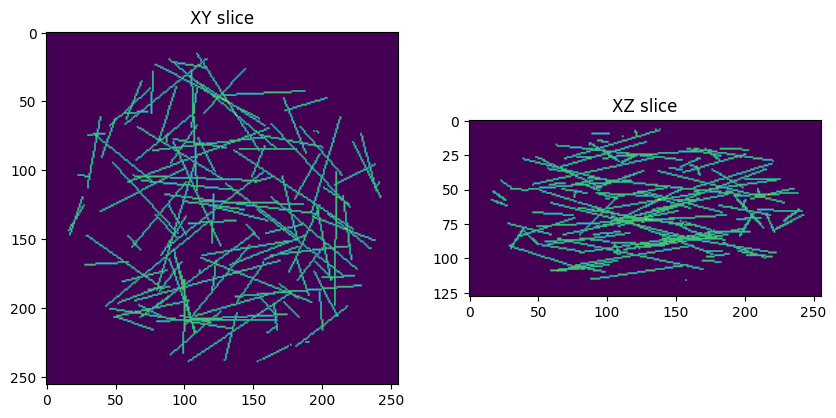

In [2]:
ground_truth = sim.ground_truth()
ortho_plot(ground_truth, mip=True)

SIM: angle 1/1, phase 1/1: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


(1, 128, 1, 256, 256)
(128, 256, 256)


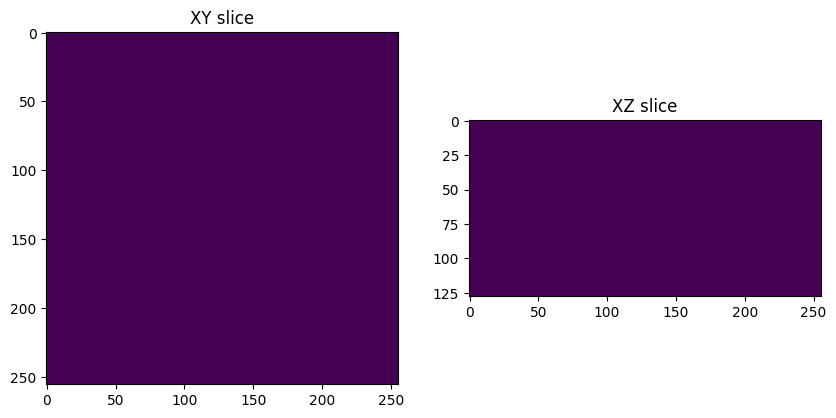

In [3]:
optical_img = sim.optical_image(ground_truth)
ortho_plot(optical_img.data[0, :, 0], mip=True)

In [4]:
np.min(optical_img[0, :, 0])

/Users/talley/dev/self/microsim/src/microsim/_data_array.py:61: UserWarning: DataArray.__getitem__ casts to numpy
  warnings.warn("DataArray.__getitem__ casts to numpy")


ValueError: conflicting sizes for dimension 'A': length 128 on the data but length 1 on coordinate 'A'